# Library

In [22]:
# load libraries
from pathlib import Path
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
methods = ['velocyto',
           'scvelo_dyn',
           'scvelo_stc',
           'veloae',
           'dynamo_m1',
           'unitvelo_ind',
           'unitvelo_uni',
           'velovae_std',
           'velovae_fullvb',
           'deepvelo',
           'celldancer',
           'pyrovelocity_m1',
           'pyrovelocity_m2',
           'kvelo',
           'velovi',
           'sdevelo',
           'cell2fate',
           'svelvetvae', 
           'latentvelo_std',
           'latentvelo_atac',
           'tivelo_std', 
           'tivelo_simple', 
           'sctour_mse',
           'sctour_nb', 
           'sctour_zinb', 
           'graphvelo_std',
           'graphvelo_atac',
           'multivelo']

newmethods = {
    'unitvelo_ind': 'UniTVelo (ind)',
    'velovi': 'VeloVI',
    'cell2fate': 'cell2fate',
    'latentvelo_atac': 'LatentVelo (ATAC)',
    'latentvelo_std': 'LatentVelo (std)',
    'pyrovelocity_m1': 'Pyro-velocity (m1)',
    'pyrovelocity_m2': 'Pyro-velocity (m2)',
    'sctour_mse': 'scTour (MSE)',
    'sctour_nb': 'scTour (NB)',
    'sctour_zinb': 'scTour (ZINB)',
    'scvelo_dyn': 'scVelo (dyn)',
    'unitvelo_uni': 'UniTVelo (uni)',
    'deepvelo': 'DeepVelo',
    'svelvetvae': 'SvelvetVAE',
    'tivelo_std': 'TIVelo (std)',
    'tivelo_simple': 'TIVelo (simple)',
    'velocyto': 'Velocyto',
    'veloae': 'VeloAE',
    'velovae_std': 'VeloVAE',
    'velovae_fullvb': 'VeloVAE (Full VB)',
    'kvelo': '$\kappa$-velo',
    'celldancer': 'cellDancer',
    'dynamo': 'Dynamo (m1)',
    'graphvelo_std': 'GraphVelo (std)',
    'graphvelo_atac': 'GraphVelo (ATAC)',
    'scvelo_stc': 'scVelo (stc)',
    'sdevelo': 'SDEvelo',
    'multivelo': 'MultiVelo'
}


dataset_names = ['data16','data17','data18']

dataset_ids = ['Data 16','Data 17','Data 18']

# CBDir

In [24]:
metric = 'cbdir'

all_dfs = []
for dataset_name in dataset_names:
    df = pd.read_csv(f'{dataset_name}/{metric}_df.csv')
    all_dfs.append(df)

method_avg_df = pd.DataFrame()

for i, df in enumerate(all_dfs):

    fold_columns = [col for col in df.columns if col != 'Method']
    
    method_avg = df.groupby('Method')[fold_columns].mean().mean(axis=1).reset_index()
    method_avg.columns = ['Method', f'{dataset_names[i]}_avg']
    
    if method_avg_df.empty:
        method_avg_df = method_avg
    else:
        method_avg_df = method_avg_df.merge(method_avg, on='Method', how='outer')

method_avg_df['overall_avg'] = method_avg_df.iloc[:, 1:].mean(axis=1)
method_avg_df = method_avg_df.sort_values('overall_avg', ascending=False).reset_index(drop=True)
method_avg_df['rank'] = range(1, len(method_avg_df) + 1)

In [25]:
method_avg_df

,Method,data16_avg,data17_avg,data18_avg,overall_avg,rank
0,pyrovelocity_m2,0.679749,0.305581,0.322517,0.435949,1
1,unitvelo_ind,0.650902,0.212946,0.251883,0.371910,2
2,sctour_nb,0.623216,0.174250,0.163403,0.320290,3
3,unitvelo_uni,0.679078,0.048830,0.200481,0.309463,4
4,celldancer,0.566382,0.013133,0.232737,0.270751,5
5,sctour_zinb,0.620532,0.034823,0.150151,0.268502,6
6,multivelo,0.651976,0.261139,-0.108041,0.268358,7
7,deepvelo,0.596534,0.155951,-0.045752,0.235578,8
8,velovi,0.562236,0.355838,-0.235961,0.227371,9
9,sdevelo,0.347970,0.141269,0.151137,0.213459,10


/tmp/ipykernel_77077/917207622.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


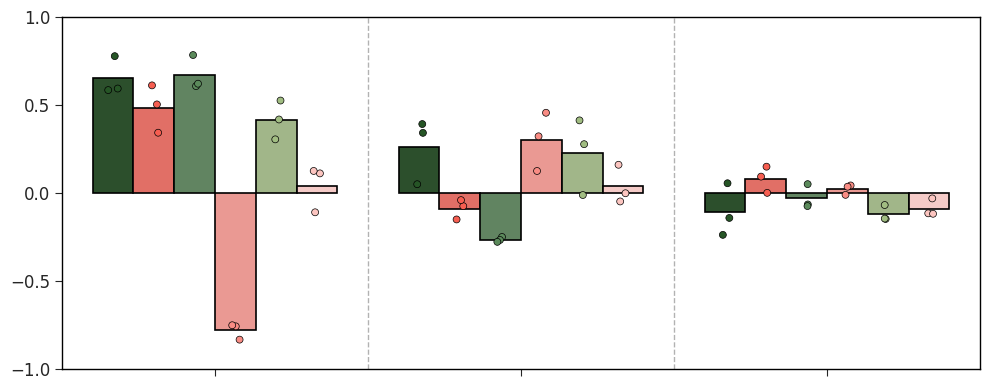

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
sns.set_style("white")

methods_to_plot = ["multivelo","scvelo_dyn","latentvelo_atac","latentvelo_std","graphvelo_atac","graphvelo_std"]

new_methods = {
    'multivelo': 'MultiVelo (Rank 7)',
    'scvelo_dyn': 'scVelo (dyn) (Rank 13)',
    'latentvelo_atac': 'LatentVelo (ATAC) (Rank 15)',
    'latentvelo_std': 'LatentVelo (std) (Rank 24)',
    'graphvelo_atac': 'GraphVelo (ATAC) (Rank 12)',
    'graphvelo_std': 'GraphVelo (std) (Rank 22)'
}

method_color = {
    'scvelo_dyn':  "#F65E51",
    'latentvelo_std': "#F98C84",
    'graphvelo_std': "#FCC5C0",
    'multivelo':  '#265526',
    'latentvelo_atac': "#5B8A5B",
    'graphvelo_atac': "#A1BD82"
}

combined = []
for idx, df in enumerate(all_dfs):
    tmp = df.melt(id_vars='Method', var_name='Fold', value_name='Metric').copy()
    tmp['Dataset'] = f"Dataset {idx+1}"
    combined.append(tmp)
combined_df = pd.concat(combined, ignore_index=True)

combined_df = combined_df[combined_df['Method'].isin(methods_to_plot)].copy()
combined_df['Method'] = pd.Categorical(combined_df['Method'], categories=methods_to_plot, ordered=True)
combined_df['Dataset'] = pd.Categorical(
    combined_df['Dataset'],
    categories=[f"Dataset {i+1}" for i in range(len(all_dfs))],
    ordered=True
)


fig, ax = plt.subplots(figsize=(10,4))


sns.barplot(
    x='Dataset', y='Metric', hue='Method', data=combined_df,
    hue_order=methods_to_plot, palette=method_color,
    ci=None, dodge=True, edgecolor='black', linewidth=1.2, ax=ax
)


sns.stripplot(
    x='Dataset', y='Metric', hue='Method', data=combined_df,
    hue_order=methods_to_plot, dodge=True, palette=method_color,
    marker='o', size=5, edgecolor='black', linewidth=0.5, alpha=1.0, ax=ax
)

ax.legend().remove()
ax.xaxis.set_tick_params(which='both', bottom=True)
ax.yaxis.set_tick_params(which='both', left=True)

num_datasets = len(all_dfs)
for i in range(num_datasets - 1):
    ax.axvline(i + 0.5, color='gray', linestyle='--', linewidth=1, alpha=0.6, zorder=0)

handles = [Patch(facecolor=method_color[m], edgecolor='black', label=new_methods[m]) for m in methods_to_plot]
legend = ax.legend(handles=handles, title="", loc='upper center', bbox_to_anchor=(0.5, -0.15),
                   ncol=4, frameon=True, fontsize=9)
ax.add_artist(legend)

ax.set_xlabel("")
ax.set_ylabel("", fontsize=12)
ax.set_xticklabels([])

ax.set_ylim(-1, 1)
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
for label in ax.get_yticklabels():
    label.set_fontsize(12)

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)
ax.tick_params(axis='both', length=5) 
# ax.grid(True, linestyle='--', axis='y', color='lightgray', alpha=0.7, zorder=0)

plt.tight_layout(rect=[0,0,1,1])
plt.savefig(f"ATAC_subset_{metric}.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()


# icvcoh

In [27]:
metric = 'icvcoh'

all_dfs = []
for dataset_name in dataset_names:
    df = pd.read_csv(f'{dataset_name}/{metric}_df.csv')
    all_dfs.append(df)

method_avg_df = pd.DataFrame()

for i, df in enumerate(all_dfs):

    fold_columns = [col for col in df.columns if col != 'Method']
    
    method_avg = df.groupby('Method')[fold_columns].mean().mean(axis=1).reset_index()
    method_avg.columns = ['Method', f'{dataset_names[i]}_avg']
    
    if method_avg_df.empty:
        method_avg_df = method_avg
    else:
        method_avg_df = method_avg_df.merge(method_avg, on='Method', how='outer')

method_avg_df['overall_avg'] = method_avg_df.iloc[:, 1:].mean(axis=1)
method_avg_df = method_avg_df.sort_values('overall_avg', ascending=False).reset_index(drop=True)
method_avg_df['rank'] = range(1, len(method_avg_df) + 1)

In [28]:
method_avg_df

,Method,data16_avg,data17_avg,data18_avg,overall_avg,rank
0,unitvelo_uni,0.941895,0.917850,0.772141,0.877295,1
1,latentvelo_atac,0.942569,0.879042,0.761672,0.861094,2
2,pyrovelocity_m2,0.835501,0.895402,0.769083,0.833329,3
3,veloae,0.820788,0.822173,0.823063,0.822008,4
4,unitvelo_ind,0.827911,0.798895,0.780329,0.802378,5
5,sctour_zinb,0.899609,0.849835,0.535387,0.761610,6
6,latentvelo_std,0.918931,0.862961,0.500319,0.760737,7
7,tivelo_std,0.753105,0.799431,0.728097,0.760211,8
8,velovi,0.618972,0.866052,0.787267,0.757430,9
9,scvelo_dyn,0.730772,0.768760,0.689070,0.729534,10


/tmp/ipykernel_77077/2266190640.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


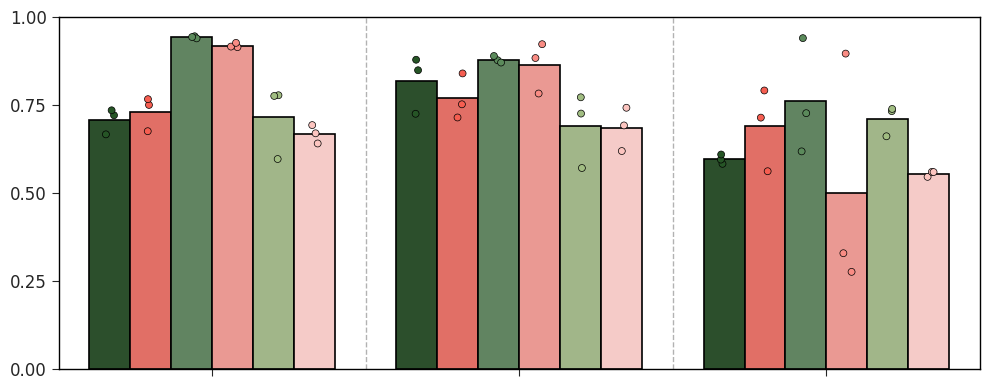

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
sns.set_style("white")

methods_to_plot = ["multivelo","scvelo_dyn","latentvelo_atac","latentvelo_std","graphvelo_atac","graphvelo_std"]

new_methods = {
    'multivelo': 'MultiVelo (Rank 12)',
    'scvelo_dyn': 'scVelo (dyn) (Rank 10)',
    'latentvelo_atac': 'LatentVelo (ATAC) (Rank 2)',
    'latentvelo_std': 'LatentVelo (std) (Rank 7)',
    'graphvelo_atac': 'GraphVelo (ATAC) (Rank 14)',
    'graphvelo_std': 'GraphVelo (std) (Rank 23)',
}

method_color = {
    'scvelo_dyn':  "#F65E51",
    'graphvelo_std': "#FCC5C0",
    'latentvelo_std': "#F98C84",
    'multivelo':  '#265526',
    'latentvelo_atac': "#5B8A5B",
    'graphvelo_atac': "#A1BD82"
}

combined = []
for idx, df in enumerate(all_dfs):
    tmp = df.melt(id_vars='Method', var_name='Fold', value_name='Metric').copy()
    tmp['Dataset'] = f"Dataset {idx+1}"
    combined.append(tmp)
combined_df = pd.concat(combined, ignore_index=True)

combined_df = combined_df[combined_df['Method'].isin(methods_to_plot)].copy()
combined_df['Method'] = pd.Categorical(combined_df['Method'], categories=methods_to_plot, ordered=True)
combined_df['Dataset'] = pd.Categorical(
    combined_df['Dataset'],
    categories=[f"Dataset {i+1}" for i in range(len(all_dfs))],
    ordered=True
)

fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(
    x='Dataset', y='Metric', hue='Method', data=combined_df,
    hue_order=methods_to_plot, palette=method_color,
    ci=None, dodge=True, edgecolor='black', linewidth=1.2, ax=ax
)

sns.stripplot(
    x='Dataset', y='Metric', hue='Method', data=combined_df,
    hue_order=methods_to_plot, dodge=True, palette=method_color,
    marker='o', size=5, edgecolor='black', linewidth=0.5, alpha=1.0, ax=ax
)


ax.legend().remove()
ax.xaxis.set_tick_params(which='both', bottom=True)
ax.yaxis.set_tick_params(which='both', left=True)
num_datasets = len(all_dfs)
for i in range(num_datasets - 1):
    ax.axvline(i + 0.5, color='gray', linestyle='--', linewidth=1, alpha=0.6, zorder=0)


handles = [Patch(facecolor=method_color[m], edgecolor='black', label=new_methods[m]) for m in methods_to_plot]
legend = ax.legend(handles=handles, title="", loc='upper center', bbox_to_anchor=(0.5, -0.15),
                   ncol=4, frameon=True, fontsize=9)
ax.add_artist(legend)

ax.set_xlabel("")
ax.set_ylabel("", fontsize=12, fontweight='bold')
ax.set_xticklabels([])

ax.set_ylim(0, 1)
ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
for label in ax.get_yticklabels():
    label.set_fontsize(12)

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

# ax.grid(True, linestyle='--', axis='y', color='lightgray', alpha=0.7, zorder=0)
ax.tick_params(axis='both', length=5) 
plt.tight_layout(rect=[0,0,1,1])
plt.savefig(f"ATAC_subset_{metric}.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()